# 2.Total possible permutations for the three different patterns:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import numpy.linalg as la

### Task 1: Representation of Graph as Adjacency Matrix.

By using an adjacency matrix we can represent our graph as a np-array of size nxn. Where n is the number of vertices. The various entries of the matrix will be 1 if there is an edge connecting two vertices and 0 else. 

In [2]:
#Defining a class to represent the graph as an adjacency matrix.
class Graph:
    def __init__(self):
        #self.n = num_of_vertices
        self.vertices = []  #An attribute for the list of vertices.
        self.n = 0  #An attribute for the number of vertices in the graph.
        self.adj_mat = None  #An attribute for the adjacency matrix.

    def add_vertice(self, v):
        #A function that adds vertices to the list self.vertices.
        if v not in self.vertices:
            self.vertices.append(v)
            print('The vertice %d has been added to the graph.' % v)
        else:
            print('The vertice %d already exists.' % v)

    def def_adj_mat(self):
        #Run this once all the vertices are added.
        self.n = len(self.vertices)
        self.adj_mat = np.zeros((self.n, self.n))  #An nxn matrix of all zeros.

    def update_adj_mat(self, index1, index2):
        self.adj_mat[index1][index2] = 1
        self.adj_mat[index2][index1] = 1

    def add_edge(self, v1, v2):
        #A function that adds edges to the graph whose vertices are stored in self.vertices.
        if all(v in self.vertices for v in [v1, v2]):
            i1 = self.vertices.index(v1)
            i2 = self.vertices.index(v2)
            self.update_adj_mat(i1, i2)
            #print(self.adj_mat)
            #print('An edge between %d and %d has been added.'%(v1,v2))
        else:
            print(
                'The specified edge cannot be added as there is no such vertices.'
            )

    def neighbors(self, v):
        #A function that returns the neighbors of the vertex v as a list.
        row = v - 1
        adj = [col + 1 for col in np.where(self.adj_mat[row])]
        adj_list = adj[0].tolist()
        return adj_list

    def count_paths(self, k):
        #A function to count the number of paths of length k.
        M = la.matrix_power(self.adj_mat, k)  #M = A**k
        print(M)
        paths = np.sum(M)
        return paths

    def visualize_graph(self,
                        graph_layout='shell',
                        node_size=1600,
                        node_color='blue',
                        node_alpha=0.3,
                        node_text_size=12,
                        edge_color='blue',
                        edge_alpha=0.3,
                        edge_tickness=1,
                        edge_text_pos=0.3,
                        text_font='sans-serif'):
        rows, cols = np.where(self.adj_mat == 1)
        edges = zip(rows.tolist(), cols.tolist())
        G = nx.Graph()
        G.add_edges_from(edges)
        G_labels = dict((v - 1, v) for v in self.vertices)
        nx.draw(G, labels=G_labels, with_labels=True)
        plt.show()

### Test case of 3x3 grid: Answer should be 389112 as mentioned in the question.

![](https://toolbox.iskysoft.com/images/topic/android-pattern-lock-ideas.jpg)

In [3]:
G2 = Graph()
for i in range(1,10):
    G2.add_vertice(i)
G2.def_adj_mat()

The vertice 1 has been added to the graph.
The vertice 2 has been added to the graph.
The vertice 3 has been added to the graph.
The vertice 4 has been added to the graph.
The vertice 5 has been added to the graph.
The vertice 6 has been added to the graph.
The vertice 7 has been added to the graph.
The vertice 8 has been added to the graph.
The vertice 9 has been added to the graph.


In [4]:
G2.add_edge(1,2)
G2.add_edge(1,4)
G2.add_edge(1,5)
G2.add_edge(1,6)
G2.add_edge(1,8)
G2.add_edge(2,3)
G2.add_edge(2,4)
G2.add_edge(2,5)
G2.add_edge(2,6)
G2.add_edge(2,7)
G2.add_edge(2,9)
G2.add_edge(3,4)
G2.add_edge(3,5)
G2.add_edge(3,6)
G2.add_edge(3,8)
G2.add_edge(4,5)
G2.add_edge(4,7)
G2.add_edge(4,8)
G2.add_edge(4,9)
G2.add_edge(5,6)
G2.add_edge(5,7)
G2.add_edge(5,8)
G2.add_edge(5,9)
G2.add_edge(6,7)
G2.add_edge(6,8)
G2.add_edge(6,9)
G2.add_edge(7,8)
G2.add_edge(8,9)

In [5]:
#Getting the adjacency matrix.
G2_adj_mat = G2.adj_mat
G2_adj_mat

array([[0., 1., 0., 1., 1., 1., 0., 1., 0.],
       [1., 0., 1., 1., 1., 1., 1., 0., 1.],
       [0., 1., 0., 1., 1., 1., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 0., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1., 0., 1., 0.],
       [1., 0., 1., 1., 1., 1., 1., 0., 1.],
       [0., 1., 0., 1., 1., 1., 0., 1., 0.]])

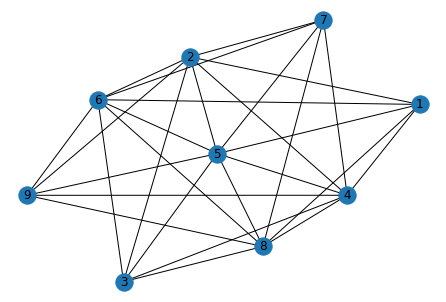

In [6]:
G2.visualize_graph()

### Task 2: Counting the number of paths of varying lengths.

The problem of counting the number of the total possible permutations for the given pattern is equivalent to finding the number of walks of length k (4<=k<=8) in the above undirected, unweighted graph.

Raising an adjacency matrix A of simple graph G (as the one above) to the k-th power gives the number of k-length walks between two vertices vi, vj of G in the resulting matrix. 

In [7]:
#A class to compute paths between vertices. Will include various algorithms as might seem fit.
class finding_paths:
    
    def __init__(self,Graph):
        self.Graph = Graph
    
    def find_pegs_node(self,s):   #s is the starting point.
        #A function that returns a dictionary of peg moves from the 
        level_dict = {s:0}
        parent_dict={s:0}
        num_moves = 1
        frontier =[s]         #All the nodes we can reach in num_moves-1.
        while frontier:
            next_nodes = []    #All nodes that can be reaced in num_moves.
            for u in frontier:
                neighbors = self.Graph.neighbors(u)   #All the neighbors of the node u.
                for v in neighbors:
                    if v not in level_dict.keys():
                        level_dict[v] = num_moves
                        parent_dict[v] = u
                        #print(parent_dict)
                        next_nodes.append(v)
            frontier = next_nodes
            num_moves +=1
        print(parent_dict)
        peg_keys = [k for k,v in level_dict.items() if v >= 2]
        peg_dict_node = {k: parent_dict[k] for k in peg_keys}
        return peg_dict_node
    
    def get_pegs(self):
        vertices = self.Graph.vertices
        pegs ={}
        for s in vertices:
            #print('I am beginning to walk from %d.' %s)
            pegs[s]=self.find_pegs_node(s)
        return pegs

In [20]:
count_path_G2 = finding_paths(G2)
pegs = count_path_G2.get_pegs()

{1: 0, 2: 1, 4: 1, 5: 1, 6: 1, 8: 1, 3: 2, 7: 2, 9: 2}
{2: 0, 1: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 9: 2, 8: 1}
{3: 0, 2: 3, 4: 3, 5: 3, 6: 3, 8: 3, 1: 2, 7: 2, 9: 2}
{4: 0, 1: 4, 2: 4, 3: 4, 5: 4, 7: 4, 8: 4, 9: 4, 6: 1}
{5: 0, 1: 5, 2: 5, 3: 5, 4: 5, 6: 5, 7: 5, 8: 5, 9: 5}
{6: 0, 1: 6, 2: 6, 3: 6, 5: 6, 7: 6, 8: 6, 9: 6, 4: 1}
{7: 0, 2: 7, 4: 7, 5: 7, 6: 7, 8: 7, 1: 2, 3: 2, 9: 2}
{8: 0, 1: 8, 3: 8, 4: 8, 5: 8, 6: 8, 7: 8, 9: 8, 2: 1}
{9: 0, 2: 9, 4: 9, 5: 9, 6: 9, 8: 9, 1: 2, 3: 2, 7: 2}


In [9]:
count_path_G2 = finding_paths(G2)
pegs = {1: {3:2},2:{4:3},3:{1:2,5:4,7:6} ,4:{},5:{3,4},6:{},7:{3:6}}
def next_steps(path):
    return (n for n in range(1,10) if (not path or n not in path and (n not in pegs[path[-1]] 
                                        or pegs[path[-1]][n] in path)))

def patterns(path, steps, verbose=False):
    if steps == 0:
        if verbose: print(path)
        return 1
    return sum(patterns(path+[n], steps-1, verbose) for n in next_steps(path))

[(steps, patterns([], steps)) for steps in range(1,8)]

TypeError: 'set' object is not subscriptable

In [17]:
sum(patterns([], steps) for steps in range(4,10))

394968

# Pattern (a):

In [10]:
#Creating an instance of class Graph to represnt G1
pat_a = Graph()
#Adding the vertices to the graph.
for i in range(1,10):
    pat_a.add_vertice(i)
#Initializing the adjacency matrix.
pat_a.def_adj_mat()

The vertice 1 has been added to the graph.
The vertice 2 has been added to the graph.
The vertice 3 has been added to the graph.
The vertice 4 has been added to the graph.
The vertice 5 has been added to the graph.
The vertice 6 has been added to the graph.
The vertice 7 has been added to the graph.
The vertice 8 has been added to the graph.
The vertice 9 has been added to the graph.


In [11]:
#Adding the edges to the graph.
pat_a.add_edge(1,2)
pat_a.add_edge(2,3)
pat_a.add_edge(3,4)
pat_a.add_edge(4,5)
pat_a.add_edge(3,6)
pat_a.add_edge(6,7)
pat_a.add_edge(1,8)
pat_a.add_edge(2,8)
pat_a.add_edge(3,8)
pat_a.add_edge(4,8)
pat_a.add_edge(5,8)
pat_a.add_edge(1,9)
pat_a.add_edge(2,9)
pat_a.add_edge(3,9)
pat_a.add_edge(6,9)
pat_a.add_edge(7,9)
pat_a.add_edge(8,9)
pat_a.add_edge(8,6)
pat_a.add_edge(8,7)
pat_a.add_edge(9,4)
pat_a.add_edge(9,5)

In [12]:
#Getting the adjacency matrix.
adj_mat_a = pat_a.adj_mat
adj_mat_a

array([[0., 1., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0.]])

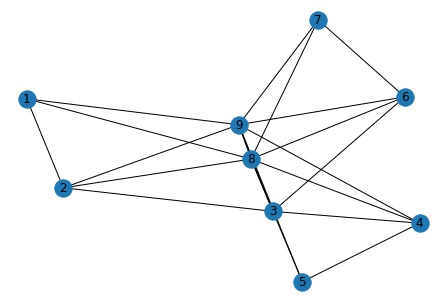

In [13]:
pat_a.visualize_graph()

In [14]:
count_path = finding_paths(pat_a)
pegs = count_path.get_pegs()
def next_steps(path):
    return (n for n in range(1,10) if (not path or n not in path and (n not in pegs[path[-1]] 
                                        or pegs[path[-1]][n] in path)))

def patterns(path, steps, verbose=False):
    if steps == 0:
        if verbose: print(path)
        return 1
    return sum(patterns(path+[n], steps-1, verbose) for n in next_steps(path))

[(steps, patterns([], steps)) for steps in range(1,8)]

[(1, 9), (2, 42), (3, 216), (4, 954), (5, 3804), (6, 12852), (7, 34524)]

In [15]:
sum(patterns([], steps) for steps in range(4,10))

183198

In [1]:
pegs ={1: {3:2,4:2,5:2},
    2: {4:3,5:3},
    3: {5:4,7:6,9:8},
    4: {2:3,1:3,1:2},
    5: {3:4,2:4,1:4},
    6: {8:3,9:3},
    7: {3:6},
    8: {6:3},
    9: {3:8}}

def next_steps(path):
    return (n for n in range(1,10) if (not path or n not in path and 
                                       (n not in pegs[path[-1]] 
                                        or pegs[path[-1]][n] in path)))

def patterns(path, steps, verbose=False):
    if steps == 0:
        if verbose: print(path)
        return 1
    return sum(patterns(path+[n], steps-1, verbose) for n in next_steps(path))

[(steps, patterns([], steps)) for steps in range(1,10)]

[(1, 9),
 (2, 54),
 (3, 294),
 (4, 1434),
 (5, 6062),
 (6, 21486),
 (7, 59671),
 (8, 114881),
 (9, 114881)]

In [2]:
sum(patterns([], steps) for steps in range(4,10))

318415

In [ ]:
p = {
    1: {3:2},
    2: {4:3},
    3: {1:2, 7:6, 5:4},
    4: {},
    5: {3:4},
    6: {},
    7: {3:6},
    8: {},
    9: {}
}